### Logistic Regression

### Data Preprocessing

In [4]:
import numpy as np

"""This script implements the functions for reading data.
"""

def load_data(filename):
    """Load a given txt file.

    Args:
        filename: A string.

    Returns:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].

    """
    data= np.load(filename)
    x= data['x']
    y= data['y']
    return x, y

def train_valid_split(raw_data, labels, split_index):
    """Split the original training data into a new training dataset
    and a validation dataset.
    n_samples = n_train_samples + n_valid_samples

    Args:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
        split_index: An integer.

    """
    return raw_data[:split_index], raw_data[split_index:], labels[:split_index], labels[split_index:]

def prepare_X(raw_X):
    """Extract features from raw_X as required.

    Args:
        raw_X: An array of shape [n_samples, 256].

    Returns:
        X: An array of shape [n_samples, n_features].
    """
    raw_image = raw_X.reshape((-1, 16, 16))

    # Feature 1: Measure of Symmetry
    F_symmetry = -np.sum(abs(raw_image - np.flip(raw_image, 2)), (1, 2))/256

    # Feature 2: Measure of Intensity
    F_intensity = np.sum(raw_X, 1)/256
    
    # Feature 3: Bias Term. Always 1.
    bias = np.ones(raw_X.shape[0])

    X = np.ones(3 * raw_X.shape[0]).reshape(-1,3)
    X[:,0] = bias
    X[:,1] = F_symmetry
    X[:,2] = F_intensity
    
    return X

def prepare_y(raw_y):
    """
    Args:
        raw_y: An array of shape [n_samples,].

    Returns:
        y: An array of shape [n_samples,].
        idx:return idx for data label 1 and 2.
    """
    y = raw_y
    idx = np.where((raw_y==1) | (raw_y==2))
    y[np.where(raw_y==0)] = 0
    y[np.where(raw_y==1)] = 1
    y[np.where(raw_y==2)] = 2

    return y, idx

### Logistic Regression

In [5]:
import numpy as np
import sys

"""This script implements a two-class logistic regression model.
"""

class logistic_regression(object):

    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit_GD(self, X, y):
        """Train perceptron model on data (X,y) with Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        n_samples, n_features = X.shape

        self.W = np.zeros(n_features)
        for t in range(self.max_iter):
            gt = 0
            for i in range(n_samples):
                gt = gt + self._gradient(X[i], y[i])
            g = gt / n_samples
            self.W = self.W + self.learning_rate * (-g)

        return self


    def fit_SGD(self, X, y):
        """Train perceptron model on data (X,y) with Stochastic Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """

        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        for t in range(self.max_iter):
            i = np.random.randint(0, n_samples)
            g = self._gradient(X[i], y[i])
            self.W = self.W + self.learning_rate * (-g)

        return self

    def _gradient(self, _x, _y):
        """Compute the gradient of cross-entropy with respect to self.W
        for one training sample (_x, _y). This function is used in fit_*.

        Args:
            _x: An array of shape [n_features,].
            _y: An integer. 1 or -1.

        Returns:
            _g: An array of shape [n_features,]. The gradient of
                cross-entropy with respect to self.W.
        """

        _g = -(_y * _x)/(1 + np.exp(_y * np.sum(self.W * _x)))
        return _g


    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
        return self.W

    def predict_proba(self, X):
        """Predict class probabilities for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds_proba: An array of shape [n_samples, 2].
                Only contains floats between [0,1].
        """
        
        pr = []
        for i in range(X.shape[0]):
            pr.append(1 / (1 + np.exp(-np.sum(self.W * X[i], 0))))
        for i in range(X.shape[0]):
            pr.append(1 / (1 + np.exp(np.sum(self.W * X[i], 0))))
        preds_proba = np.array(pr).reshape(2, -1).T
        return preds_proba



    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """
       
        preds = self.predict_proba(X)[:, 0]
        for i in range(len(preds)):
            if preds[i] < 0.5:
                preds[i] = -1
            if preds[i] >= 0.5:
                preds[i] = 1
        return(preds)


    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """

        score = float(np.mean(self.predict(X) == y))
        return score


    def assign_weights(self, weights):
        self.W = weights
        return self


### Main

Size of dataset = 2930 

Check GD, SGD
[ 0.18761413  3.55944904 -2.06327285]
0.9444444444444444
[-0.24852886  3.73803656 -1.81437798]
0.9607407407407408
Grid search hyper-parameters

Best combination on validation set is [0.5, 200]

Visualize the best model and save figure

Testing

Test accuracy of the model is 0.935064935064935
The model is [ 0.24570433  5.45642203 -3.16752056]


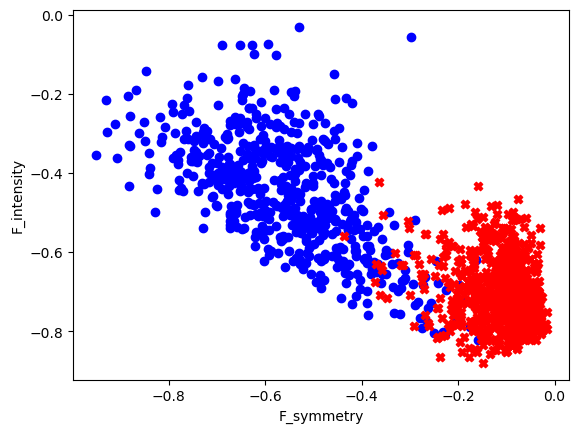

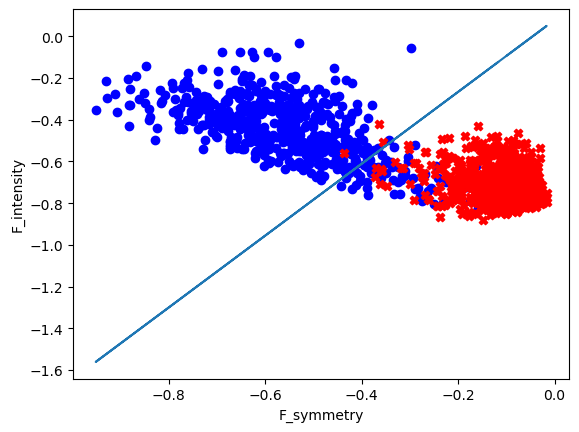

In [16]:
import os
import matplotlib.pyplot as plt

data_dir = ""
train_filename = "training.npz"
test_filename = "test.npz"
    
def visualize_features(X, y):
    '''This function is used to plot a 2-D scatter plot of training features. 

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.

    Returns:
        No return. Save the plot to 'train_features.*' and include it
        in submission.
    '''

    plt.figure()
    plt.scatter(X[y==-1, 0], X[y==-1, 1], marker="o",c="blue")
    plt.scatter(X[y==1, 0], X[y==1, 1], marker="X",c="red")
    plt.xlabel("F_symmetry")
    plt.ylabel("F_intensity")
    plt.savefig("train_features.png")


def visualize_result(X, y, W):
    '''This function is used to plot the sigmoid model after training. 

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.
        W: An array of shape [n_features,].

    Returns:
        No return. Save the plot to 'train_result_sigmoid.*' and include it
        in submission.
    '''

    plt.figure()
    plt.scatter(X[y==-1, 0], X[y==-1, 1], marker="o",c="blue")
    plt.scatter(X[y==1, 0], X[y==1, 1], marker="X",c="red")
    plt.xlabel("F_symmetry")
    plt.ylabel("F_intensity")
    x1 = X[:,0]
    x2 = (-(W[0] + W[1] * x1) / W[2])
    plt.plot(x1, x2)
    plt.savefig("train_result_sigmoid.png")



def main():
    # Data Preprocessing
    # Read data for training.
    
    raw_data, labels = load_data(os.path.join(data_dir, train_filename))
    raw_train, raw_valid, label_train, label_valid = train_valid_split(raw_data, labels, 2300)

    ##### Preprocess raw data to extract features
    train_X_all = prepare_X(raw_train)
    valid_X_all = prepare_X(raw_valid)
    ##### Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    train_y_all, train_idx = prepare_y(label_train)
    valid_y_all, val_idx = prepare_y(label_valid)  

    ####### For binary case, only use data from '1' and '2'  
    train_X = train_X_all[train_idx]
    train_y = train_y_all[train_idx]
    ####### Only use the first 1350 data examples for binary training. 
    train_X = train_X[0:1350]
    train_y = train_y[0:1350]
    valid_X = valid_X_all[val_idx]
    valid_y = valid_y_all[val_idx]
    ####### set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class. 
    train_y[np.where(train_y==2)] = -1
    valid_y[np.where(valid_y==2)] = -1
    data_shape= train_y.shape[0] 

    ## Visualize training data.
    print('Size of dataset =', len(raw_data), '\n')
    visualize_features(train_X[:, 1:3], train_y)


   # Logistic Regression Sigmoid Case

   ##### Check GD, SGD
    print('Check GD, SGD')
    logisticR_classifier = logistic_regression(learning_rate=0.5, max_iter=100)
    
    logisticR_classifier.fit_GD(train_X, train_y)
    print(logisticR_classifier.get_params())
    print(logisticR_classifier.score(train_X, train_y))

    logisticR_classifier.fit_SGD(train_X, train_y)
    print(logisticR_classifier.get_params())
    print(logisticR_classifier.score(train_X, train_y))


    # Explore different hyper-parameters.
    print('Grid search hyper-parameters')
    learning_rate = [0.1, 0.2, 0.5]
    max_iter = [100, 200]
    
    best_score = -1
    for l_r in learning_rate:
        for m_i in max_iter:
            v_model = logistic_regression(learning_rate=l_r, max_iter=m_i)
            v_model.fit_SGD(valid_X, valid_y)
            if v_model.score(valid_X, valid_y) > best_score:
                best_score = v_model.score(valid_X, valid_y)
                best_params = [l_r, m_i]
    print("\nBest combination on validation set is", best_params)

    print('\nVisualize the best model and save figure')
    
    best_logisticR = logistic_regression(best_params[0], best_params[1])
    best_logisticR.fit_SGD(train_X, train_y)
    best_model = best_logisticR.get_params()
    visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())

    print('\nTesting')

    raw_test, test_labels = load_data(os.path.join(data_dir, test_filename))
    test_X_all = prepare_X(raw_test)
    test_y_all, test_idx = prepare_y(test_labels) 
    test_X = test_X_all[test_idx]
    test_y = test_y_all[test_idx]
    test_y[np.where(test_y==2)] = -1
    print("\nTest accuracy of the model is", best_logisticR.score(test_X, test_y))
    print("The model is", best_model)

if __name__ == '__main__':
    main()